In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

from matplotlib.patches import Circle, Wedge, Polygon
from utils.plots import EllipticalWedge

sns.set(context='notebook', palette='colorblind', style='ticks',
        font='serif', font_scale=1.5)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

plt.rcParams["text.usetex"] = "true"

In [3]:
# linear basis tensors
ep = array([[1, 0], [0, -1]])
ec = array([[0, 1], [1, 0]])

def hphc_ellip(wt, A=0.2, ellip=1, theta=0):
    coswt = cos(wt)
    sinwt = sin(wt)
    hp = coswt*cos(theta) - ellip*sinwt*sin(theta)
    hc = coswt*sin(theta) + ellip*sinwt*cos(theta)
    return A*hp, A*hc

def dxdy_ellip(XY, *args, **kwargs):
    hp, hc = hphc_ellip(*args, **kwargs)
    return dot(hp*ep + hc*ec, XY)

In [4]:
def plot_diagram(A=0.2, ellip=1, theta=0, A0=1, Nt=5, Npoints=16, ax_width=None, i0=4, palette='crest'):
    wts = linspace(0, 2*pi, Nt)

    th = linspace(0, 2*pi, Npoints, endpoint=False)
    X = A0*cos(th)
    Y = A0*sin(th)
    
    ax_width = ax_width or 2*A0

    nrow = 3
    fig = figure(constrained_layout=True, figsize=(ax_width*Nt, nrow*ax_width))
    gs = fig.add_gridspec(nrow, Nt)
    
    ellip_kws = dict(ellip=ellip, theta=theta)

    # draw a the trajectory of a highlighted point
    x, y = X[i0], Y[i0]
    dxs, dys = [], []
    for wt in linspace(0, 2*pi, 50):
        dx, dy = dxdy_ellip([x, y], wt, A=A, **ellip_kws)
        dxs.append(dx)
        dys.append(dy)
    dxs = array(dxs)
    dys = array(dys)

    # initial angle for highlighted point
    th0 = arctan2(dys[0], dxs[0])

    c = sns.color_palette(palette, n_colors=Npoints)
    for i, wt in enumerate(wts):
        ax = fig.add_subplot(gs[0, i])
        
        ax.axhline(0, 0.5, 0.6, c='gray', lw=0.5)
        ax.axvline(0, 0.5, 0.6, c='gray', lw=0.5)
        kws = dict(fontsize=14, horizontalalignment='right', verticalalignment='top')
        if i==0:
            ax.annotate(r'$x$', xy=(0.5, 0), **kws)
            ax.annotate(r'$y$', xy=(-0.1, 0.5), **kws)
        
        dX, dY = dxdy_ellip([X, Y], wt, A=A, **ellip_kws)

        # highlighted point
        wedge = EllipticalWedge([X[i0], Y[i0]], A*A0, 0, rad2deg(wt), ellip=ellip,
                                angle=th0, color=c[i0], alpha=0.1)
        ax.add_patch(wedge)
        ax.annotate("", xy=(X[i0] + dX[i0], Y[i0] + dY[i0]), xytext=(X[i0], Y[i0]),
                    arrowprops=dict(arrowstyle="-", color=c[i0], alpha=0.5))
        ax.plot(x+dxs, y+dys, c=c[i0], alpha=0.5, lw=1, ls=':')


        ax.scatter(X, Y, label=wt, edgecolors=c, facecolor='none', s=5, alpha=0.5)
        ax.scatter(X + dX, Y + dY, c=c)

        ax.axis('off')
        ax.axis('equal')
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)

    # get offset of first subplot center in display coordinates
    w = ax.transData.transform((-1.2, 0))[0]

    ax = fig.add_subplot(gs[1,:])

    # convert the offset to coordinates of the new axis in
    w_new = 0.85*ax.transData.inverted().transform((w,0))[0]

    wts2 = linspace(0, 2*pi, 100)
    ax.axhline(0, c='gray', ls=':')#c='0.8', lw=3, ls='--')
    for wt in wts:
        ax.axvline(wt, 0, 1, c='gray', ls=':')

    # kws = dict(horizontalalignment='center', verticalalignment='center',
    #            bbox=dict(fc="w", lw=0, alpha=0.5))
    # ax.annotate(r'$+$', xy=(-0.1, 1), **kws)
    # ax.annotate(r'$\times$', xy=(-0.1, 0), **kws)

    hp2, hc2 = hphc_ellip(wts2, A=1, **ellip_kws)

    ax.plot(wts2, hp2, lw=2, c=c[-1], label=r'$+$')
    ax.plot(wts2, hc2, lw=2, c=c[-5], ls='--', label=r'$\times$')
    
    ax.legend(loc='lower right', edgecolor='w')

    ax.set_xlim(-w_new, 2*pi+w_new)
    ax.set_ylim(-1.2, 1.2)
    ax.axis('off');

    hp, hc = hphc_ellip(wts, A=1, **ellip_kws)

    for i, wt in enumerate(wts):
        ax = fig.add_subplot(gs[2, i])

        ax.axhline(0, 0.5, c='gray', lw=1)
        ax.axvline(0, 0.5, c='gray', lw=1)
        kws = dict(fontsize=14, horizontalalignment='right', verticalalignment='top')
        if i==0:
            ax.annotate(r'$h_+$', xy=(1.45, -0.1), **kws)
            ax.annotate(r'$h_\times$', xy=(-0.05, 1.5), **kws)
            
        ax.plot(hp2, hc2)

        wedge = EllipticalWedge([0, 0], 1, 0, rad2deg(wt), ellip=ellip,
                                angle=theta, color=c[i0], alpha=0.1)
        ax.add_patch(wedge)
        ax.annotate("", xy=(hp[i], hc[i]), xytext=(0, 0),
                    arrowprops=dict(arrowstyle="->", color=c[-1], lw=2, 
                                    shrinkA=0, shrinkB=0))

        ax.axis('off')
        ax.axis('equal')
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
    return fig

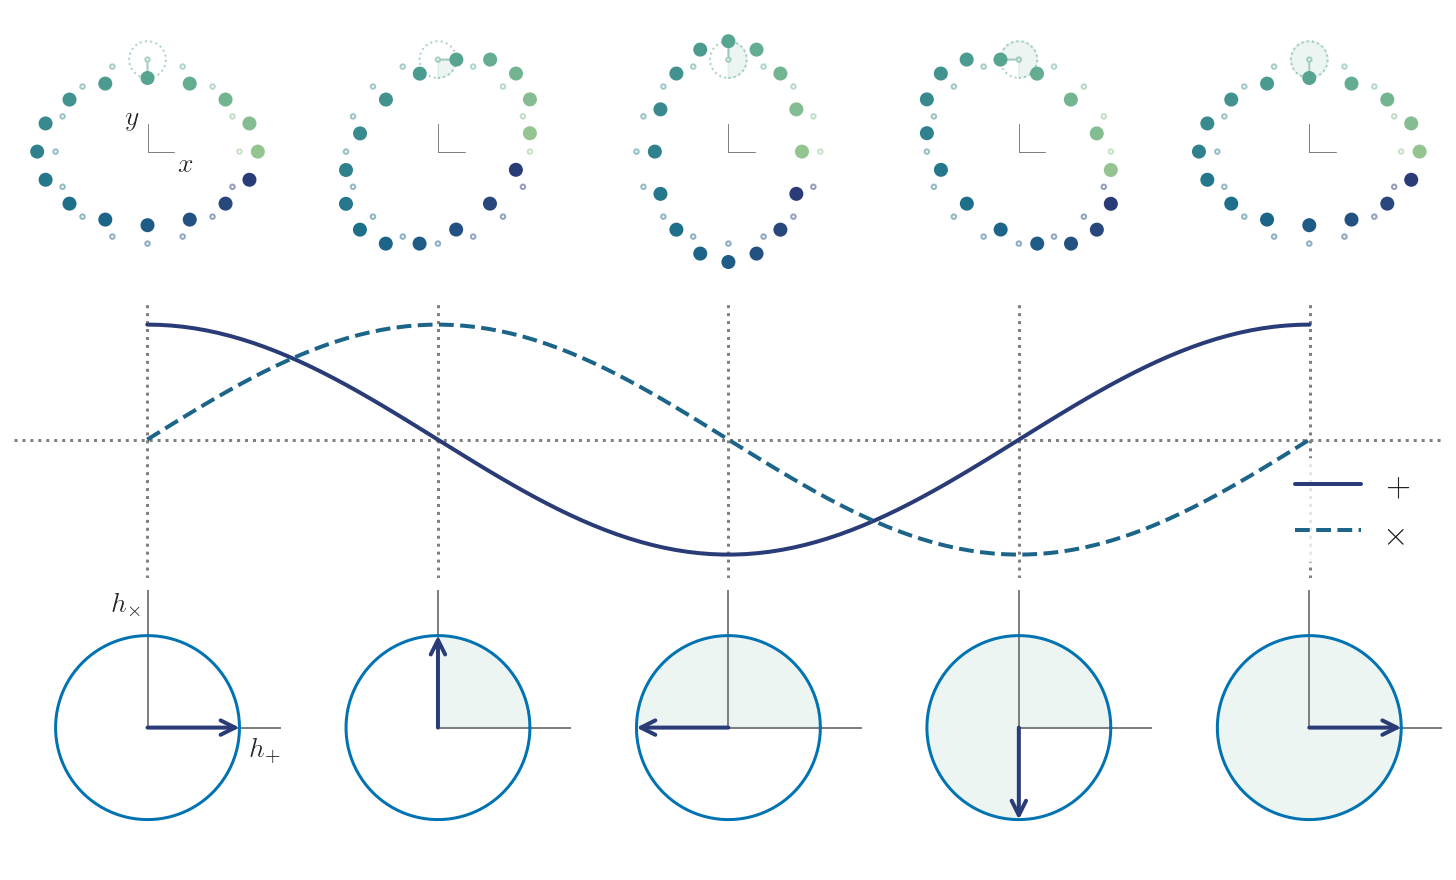

In [5]:
plot_diagram();
savefig('pol_diagram_circ.pdf', bbox_inches='tight')

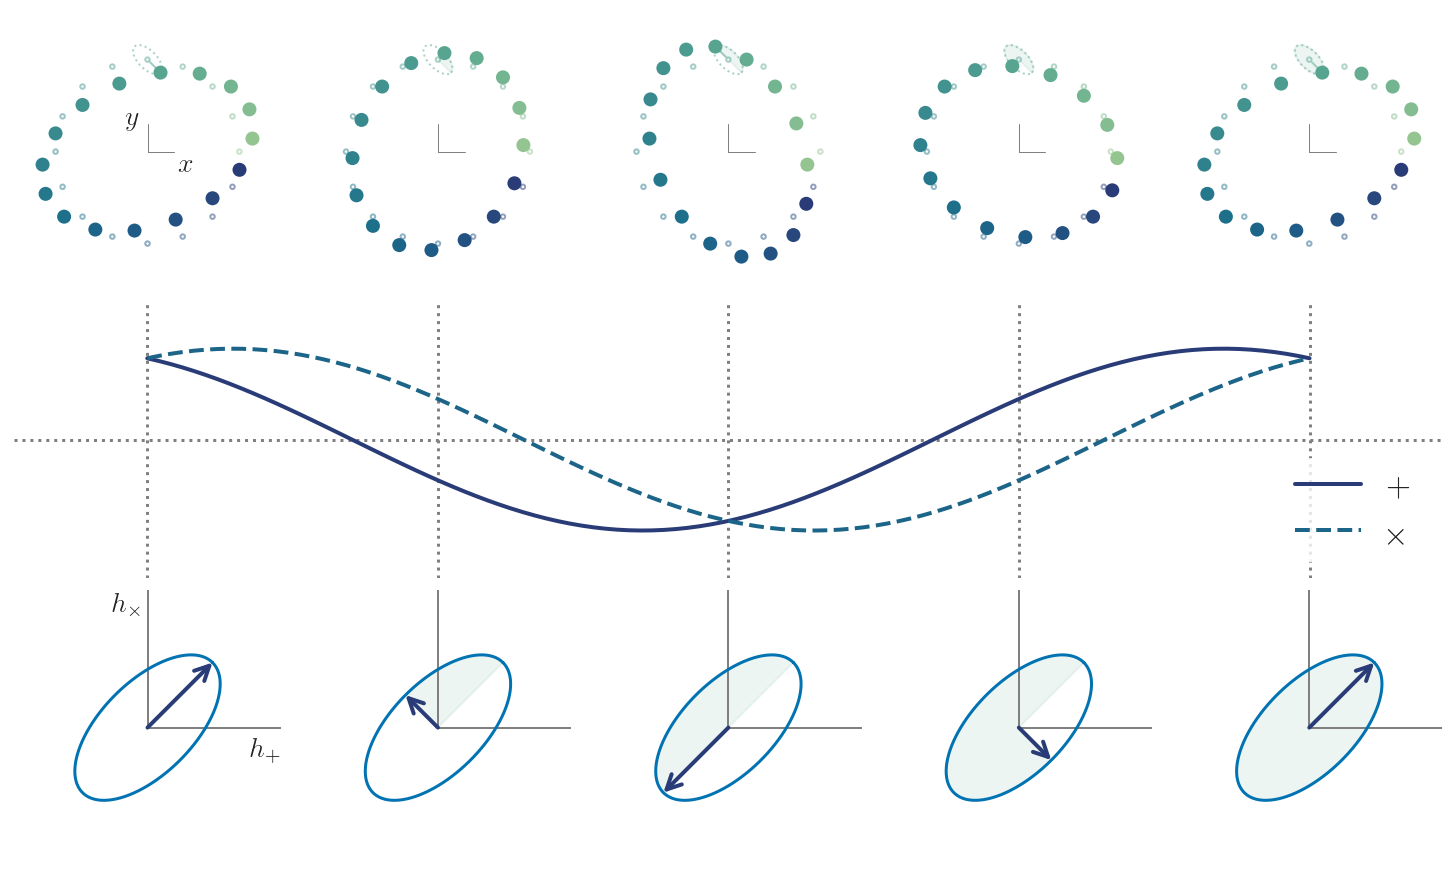

In [6]:
plot_diagram(A0=1, ellip=0.5, theta=pi/4);
savefig('pol_diagram_ellip.pdf', bbox_inches='tight')

## Instataneous state

In [7]:
import imageio

In [8]:
def plot_instant(wt=0, A=0.2, ellip=1, theta=0, A0=1, Npoints=16, ax_width=None, i0=4, palette='crest'):
    
    th = linspace(0, 2*pi, Npoints, endpoint=False)
    X = A0*cos(th)
    Y = A0*sin(th)
    
    nrow, ncol = 1, 6
    ax_width = ax_width or 2*A0
    fig = figure(constrained_layout=True, figsize=(0.5*ax_width*ncol, nrow*ax_width), dpi=150)
    gs = fig.add_gridspec(2*nrow, ncol)
    
    ellip_kws = dict(ellip=ellip, theta=theta)
    wts = linspace(0, 2*pi, 100)

    # draw a the trajectory of a highlighted point
    x, y = X[i0], Y[i0]
    dxs, dys = [], []
    for wt_i in wts:
        dx, dy = dxdy_ellip([x, y], wt_i, A=A, **ellip_kws)
        dxs.append(dx)
        dys.append(dy)
    dxs = array(dxs)
    dys = array(dys)

    # initial angle for highlighted point
    th0 = arctan2(dys[0], dxs[0])

    c = sns.color_palette(palette, n_colors=Npoints)
    
    ax = fig.add_subplot(gs[:, :2])

    ax.axhline(0, 0.5, 0.6, c='gray', lw=0.5)
    ax.axvline(0, 0.5, 0.6, c='gray', lw=0.5)
    kws = dict(fontsize=14, horizontalalignment='right', verticalalignment='top')
    ax.annotate(r'$x$', xy=(0.5, 0), **kws)
    ax.annotate(r'$y$', xy=(-0.1, 0.5), **kws)

    dX, dY = dxdy_ellip([X, Y], wt, A=A, **ellip_kws)

    # highlighted point
    wedge = EllipticalWedge([X[i0], Y[i0]], A*A0, 0, rad2deg(wt), ellip=ellip,
                            angle=th0, color=c[i0], alpha=0.1)
    ax.add_patch(wedge)
    ax.annotate("", xy=(X[i0] + dX[i0], Y[i0] + dY[i0]), xytext=(X[i0], Y[i0]),
                arrowprops=dict(arrowstyle="-", color=c[i0], alpha=0.5))
    ax.plot(x+dxs, y+dys, c=c[i0], alpha=0.5, lw=1, ls=':')


    ax.scatter(X, Y, label=wt, edgecolors=c, facecolor='none', s=5, alpha=0.5)
    ax.scatter(X + dX, Y + dY, c=c)

    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    hp, hc = hphc_ellip(wt, A=1, **ellip_kws)
    hp2, hc2 = hphc_ellip(wts, A=1, **ellip_kws)
    
    ax = fig.add_subplot(gs[0,2])
    
    # ax.axhline(0, 0.5, 0.6, c='gray', lw=0.5)
    # ax.axvline(0, 0.5, 0.6, c='gray', lw=0.5)

    dX, dY = A*dot(hp*ep, [X, Y])

    ax.scatter(X, Y, label=wt, edgecolors=c, facecolor='none', s=2, alpha=0.5)
    ax.scatter(X + dX, Y + dY, c=c, s=8)
    
    kws = dict(fontsize=14, horizontalalignment='center', verticalalignment='center',
          xycoords='axes fraction')
    ax.annotate(r'$+$', xy=(0.5, 0.5), **kws)

    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    ax = fig.add_subplot(gs[1,2])
    
    # ax.axhline(0, 0.5, 0.6, c='gray', lw=0.5)
    # ax.axvline(0, 0.5, 0.6, c='gray', lw=0.5)

    dX, dY = A*dot(hc*ec, [X, Y])

    ax.scatter(X, Y, label=wt, edgecolors=c, facecolor='none', s=2, alpha=0.5)
    ax.scatter(X + dX, Y + dY, c=c, s=8)
    
    ax.annotate(r'$\times$', xy=(0.52, 0.5), **kws)

    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)


    ax = fig.add_subplot(gs[:, 3:5])

    ax.axhline(0, 0.5, c='gray', lw=1)
    ax.axvline(0, 0.5, c='gray', lw=1)
    kws = dict(fontsize=14, horizontalalignment='right', verticalalignment='top',
              xycoords='axes fraction')
    ax.annotate(r'$h_+$', xy=(1, 0.49), **kws)
    ax.annotate(r'$h_\times$', xy=(0.49, 1), **kws)

    ax.plot(hp2, hc2)

    wedge = EllipticalWedge([0, 0], 1, 0, rad2deg(wt), ellip=ellip,
                            angle=theta, color=c[i0], alpha=0.1)
    ax.add_patch(wedge)
    ax.annotate("", xy=(hp, hc), xytext=(0, 0),
                arrowprops=dict(arrowstyle="->", color=c[-1], lw=2, 
                                shrinkA=0, shrinkB=0))
    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
    
    # plot quadratures
    
    phi0 = 0
    CR = 0.5*(1 + ellip)
    CL = 0.5*(1 - ellip)
    phiR = phi0 - theta
    phiL = -(theta + phi0)
    
    Apx = CR*cos(phiR) + CL*cos(phiL)
    Apy = CR*sin(phiR) - CL*sin(phiL)
    
    Acx = -CR*sin(phiR) - CL*sin(phiL)
    Acy = CR*cos(phiR) - CL*cos(phiL)
    
    ax = fig.add_subplot(gs[0, -1])

    ax.axhline(0, 0.5, c='gray', lw=1)
    ax.axvline(0, 0.5, c='gray', lw=1)
    kws = dict(fontsize=10, horizontalalignment='right', verticalalignment='top',
              xycoords='axes fraction')
    ax.annotate(r'$x_{+}$', xy=(1, 0.48), **kws)
    ax.annotate(r'$y_{+}$', xy=(0.48, 1), **kws)

    # the circle size will be given by the projection of the polarizaiton
    # ellipse onto the h+ access
    rp = linalg.norm([Apx, Apy])
    #print(rp, max(hp2))
    ax.plot(rp*cos(wts), rp*sin(wts), alpha=0.5)

    ## TODO: there must be a better way to do this
    phip = arctan2(Apy, Apx)
    yp = rp*sin(wt - phip)
    ax.arrow(0, 0, hp, 0, width=0.05, color=c[-1], 
             length_includes_head=True, zorder=10)
    ax.arrow(0, 0, hp, yp, width=0.01, color=c[-1], 
             length_includes_head=True, zorder=10)
    
    ax.fill_between(linspace(0, hp, 50), yp, alpha=0.1)

    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    
        
    # plot x quadrature
    ax = fig.add_subplot(gs[1, -1])

    ax.axhline(0, 0.5, c='gray', lw=1)
    ax.axvline(0, 0.5, c='gray', lw=1)
    ax.annotate(r'$x_{\times}$', xy=(1, 0.48), **kws)
    ax.annotate(r'$y_{\times}$', xy=(0.48, 1), **kws)

    # the circle size will be given by the projection of the polarizaiton
    # ellipse onto the h+ access
    rc = max(hc2)
    
    ## TODO: there must be a better way to do this
    phic = arctan2(Acy, Acx)
    yc = rc*sin(wt - phic)
    ax.plot(rc*cos(wts), rc*sin(wts), alpha=0.5)

    ax.arrow(0, 0, hc, 0, width=0.05, color=c[-5], 
             length_includes_head=True, zorder=10)
    ax.arrow(0, 0, hc, yc, width=0.01, color=c[-5], 
             length_includes_head=True, zorder=10)
    
    ax.fill_between(linspace(0, hc, 50), yc, alpha=0.1)
    
    ax.axis('off')
    ax.axis('equal')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    return fig

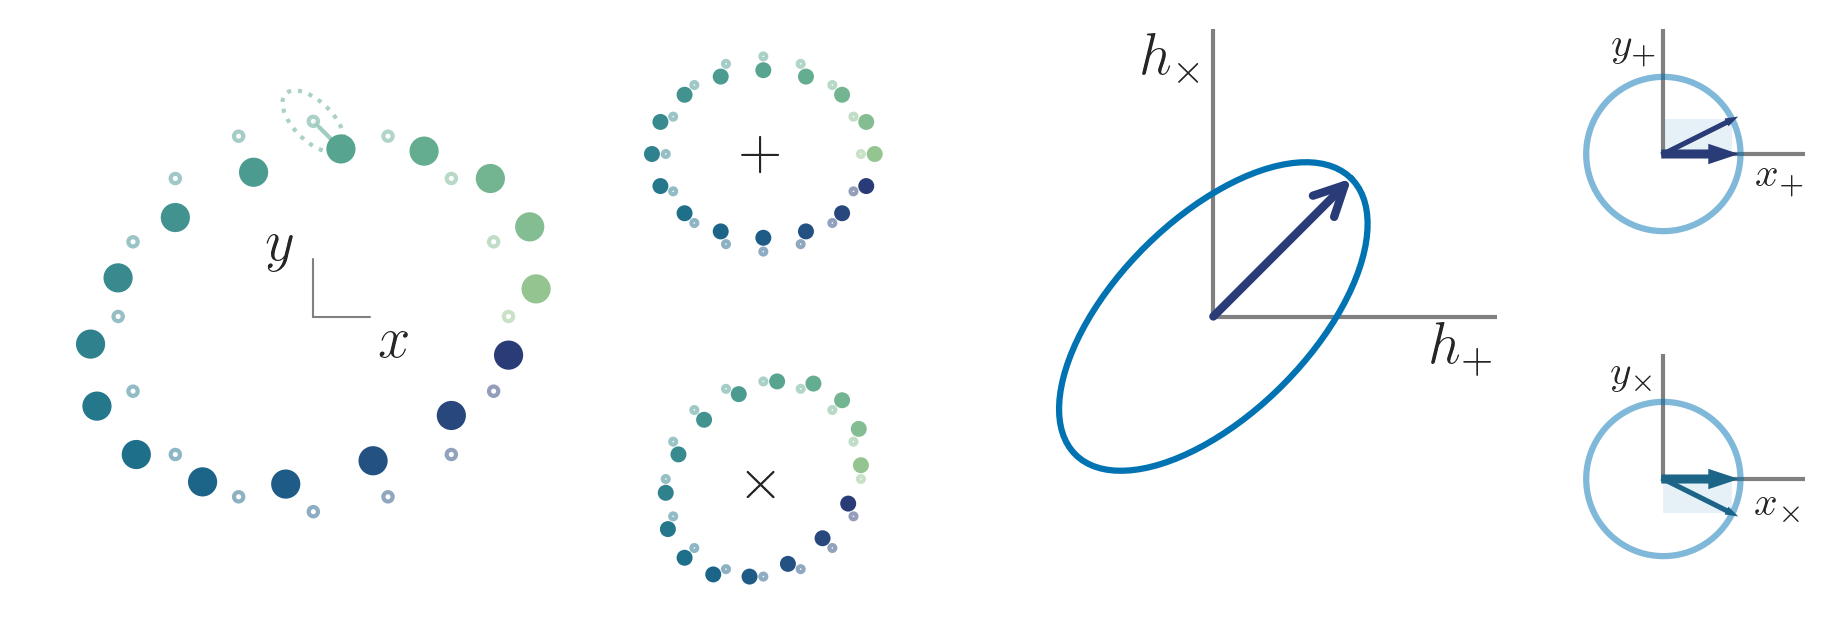

In [9]:
for wt in linspace(0, 2*pi, 1):
    plot_instant(wt, ellip=0.5, theta=pi/4);

In [10]:
# get GIF
# see https://ndres.me/post/matplotlib-animated-gifs-easily/

def get_snap(*args, **kws):
    fig = plot_instant(*args, **kws);
    
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

In [11]:
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_snap(wt))
    plt.close()
imageio.mimsave('pol_circ_r.gif', figlist, fps=12);

In [12]:
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
nfs = 50
figlist = []
for wt in linspace(2*pi, 0, nfs):
    figlist.append(get_snap(wt))
    plt.close()
imageio.mimsave('pol_circ_l.gif', figlist, fps=12);

In [13]:
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_snap(wt, ellip=0))
    plt.close()
imageio.mimsave('pol_lin_p.gif', figlist, fps=12);

In [14]:
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_snap(wt, ellip=0, theta=pi/2))
    plt.close()
imageio.mimsave('pol_lin_c.gif', figlist, fps=12);

In [15]:
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_snap(wt, ellip=0, theta=pi/4))
    plt.close()
imageio.mimsave('pol_lin_diag.gif', figlist, fps=12);

In [16]:
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_snap(wt, ellip=0.5, theta=pi/4))
    plt.close()
imageio.mimsave('pol_ellip.gif', figlist, fps=12);

## Spherical animation

In [94]:
from pyspherical import spin_spherical_harmonic

In [70]:
# define source-centered Cartesian frame {X, Y, Z} based on which to 
# define Ylm's
X = array([1, 0, 0])
Y = array([0, 1, 0])
Z = array([0, 0, 1])

# the wave propagation vector will be
def wave_nhat(theta, phi):
    n = [sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)]
    return array(n)

# define polarization axes X and Y following LIGO convention
# https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group___l_a_l_simulation__h.html
# https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/group__lalsimulation__inspiral.html
def wave_xy(theta=None, phi=None, nhat=None):
    if nhat is None:
        nhat = wave_nhat(theta, phi)
    # the x vector will be n x Z
    if nhat[2] == 1:
        # theta = 0 so there's ambiguity about frame orientation,
        # disambiguate manually
        x = array([cos(phi), sin(phi), 0])
    else:
        x = cross(nhat, Z)
    # the y vector is n x x
    y = cross(nhat, x)
    return x/linalg.norm(x), y/linalg.norm(y)

def get_ring(theta=None, phi=None, nhat=None, npoints=16, r=0.1):
    # distribute `npoints` points in a circle around the sky location 
    # defined by theta and phi, with radius `r` around the center
    n = nhat if nhat is not None else wave_nhat(theta, phi)
    x, y = wave_xy(theta, phi, n)
    # compute angular separation between points
    angle = 2*pi / npoints
    # first point will be anchored in the direction of the waveframe x
    points = [r*x]
    # now rotate that initial point `npoints` times around nhat
    # to do that, first define a rotation matrix around n
    # (this is simply a composition of matrices rotating aroung X, Y, Z,
    # but let's code up the resulting matrix---lifted from Wikipedia---
    # directly to make this more efficient
    costh, sinth = cos(angle), sin(angle)
    p = 1 - costh
    R = array([[costh + n[0]*n[0]*p,      n[0]*n[1]*p - n[2]*sinth, n[0]*n[2]*p + n[1]*sinth],
                [n[0]*n[1]*p + n[2]*sinth, costh + n[1]*n[1]*p,      n[1]*n[2]*p - n[0]*sinth],
                [n[0]*n[2]*p - n[1]*sinth, n[2]*n[1]*p + n[0]*sinth, costh + n[2]*n[2]*p]])
    # we can now apply the rotation iteratively
    for i in range(1, npoints):
        points.append(dot(R, points[i-1]))
    return array(points)

def get_epec(theta=None, phi=None, nhat=None):
    x, y = wave_xy(theta, phi, n)
    ep = outer(x, x) - outer(y, y)
    ec = outer(x, y) + outer(y, x)
    return ep, ec    

In [75]:
# functions to lay down Fibonacci grid on the sphere

def cartesian_to_spherical(xyz, north_polar=True):
    """ Efficiently convert points from Carstesian to spherical coordinates.

    https://stackoverflow.com/questions/4116658/faster-numpy-cartesian-to-spherical-coordinate-conversion
    """
    ptsnew = np.zeros(xyz.shape)
    xy = xyz[:,0]**2 + xyz[:,1]**2
    # radius
    ptsnew[:,0] = np.sqrt(xy + xyz[:,2]**2)
    if north_polar:
        # elevation (polar) angle defined from Z-axis down
        ptsnew[:,1] = np.arctan2(np.sqrt(xy), xyz[:,2])
    else:
        # elevation (polar) angle defined from XY-plane up
        ptsnew[:,1] = np.arctan2(xyz[:,2], np.sqrt(xy))
    # azimuthal angle from x-axis
    ptsnew[:,2] = np.arctan2(xyz[:,1], xyz[:,0])
    return ptsnew


def fibonacci_sphere(samples, randomize=False, spherical=True, **kwargs):
    """ Create a Fibonacci grid on the unit sphere.

    https://stackoverflow.com/questions/9600801/evenly-distributing-n-points-on-a-sphere

    Arguments
    ---------
    samples : int
        number of points to draw
    randomize : bool

    Returns
    -------
    points : array
        [x, y, z] or [r, theta, phi] or [r, np.pi-theta, phi]
    """
    rnd = 1.
    if randomize:
        rnd = random.random() * samples
    points = []
    offset = 2./samples
    increment = np.pi * (3. - np.sqrt(5.));
    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2);
        r = np.sqrt(1 - pow(y, 2))
        phi = ((i + rnd) % samples) * increment
        x = np.cos(phi) * r
        z = np.sin(phi) * r
        points.append([x,y,z])
    points = np.array(points)
    if spherical:
        points = cartesian_to_spherical(points, **kwargs)
    return points

In [76]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# th, phi = pi/2, 3*pi/2
# ps = get_ring(th, phi)
# n = wave_nhat(th, phi)
# ps += n

# ax.scatter(ps[:,0], ps[:,1], ps[:,2])

# na = vstack([zeros(3), n])
# ax.plot(na[:,0], na[:,1], na[:,2])

In [157]:
def sphere_snap(wt, nsphere=56, ncircle=16, rcircle=0.5, rsphere=5):
    # let's pick a number of points in the sphere to serve as centers
    # to our little rings (these are just nhats in spherical coordinates)
    nhats_sph = fibonacci_sphere(nsphere)

    # let's produce a ring around each of these sky locations
    rings = [get_ring(theta, phi, npoints=ncircle, r=rcircle) for _, theta, phi in nhats_sph]


    nhats_xyz = rsphere*fibonacci_sphere(nsphere, spherical=False)

    el, em = 2, 2
    A = 1

    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(projection='3d')
    
    cmap = matplotlib.cm.get_cmap('magma')
    norm = matplotlib.colors.Normalize(vmin=-A, vmax=A)
    
    for a in [X,Y,Z]:
        p = vstack([zeros(3), a])
        plot(p[:,0], p[:,1], p[:,2], c='gray')
        
#     # Make sphere data
#     u = np.linspace(0, 2 * np.pi, 100)
#     v = np.linspace(0, np.pi, 100)
#     x = 0.95 *rsphere * np.outer(np.cos(u), np.sin(v))
#     y = 0.95 *rsphere * np.outer(np.sin(u), np.sin(v))
#     z = 0.95 *rsphere * np.outer(np.ones(np.size(u)), np.cos(v))

#     # Plot the surface
#     ax.plot_surface(x, y, z, color='b', lw=0)

    ax.scatter(nhats_xyz[:,0], nhats_xyz[:,1], nhats_xyz[:,2], marker='.', s=1, color='k')
    for n, nsph, ring in zip(nhats_xyz, nhats_sph, rings):
        _, theta, phi = nsph

        h = A * spin_spherical_harmonic(-2, el, em, theta, phi)*exp(-1j*em*wt) + \
            (-1)**el * A * spin_spherical_harmonic(-2, el, -em, theta, phi)*exp(1j*em*wt)
        ep, ec = get_epec(theta, phi)

        dx = dot(h.real*ep - h.imag*ec, ring.T).T

        new_ring = ring + dx
        ps = n + new_ring
        ax.plot(ps[:,0], ps[:,1], ps[:,2], color=cmap(abs(h)), lw=1)

    ax.set_box_aspect((1, 1, 1))
    ax.axis('off')
    return fig

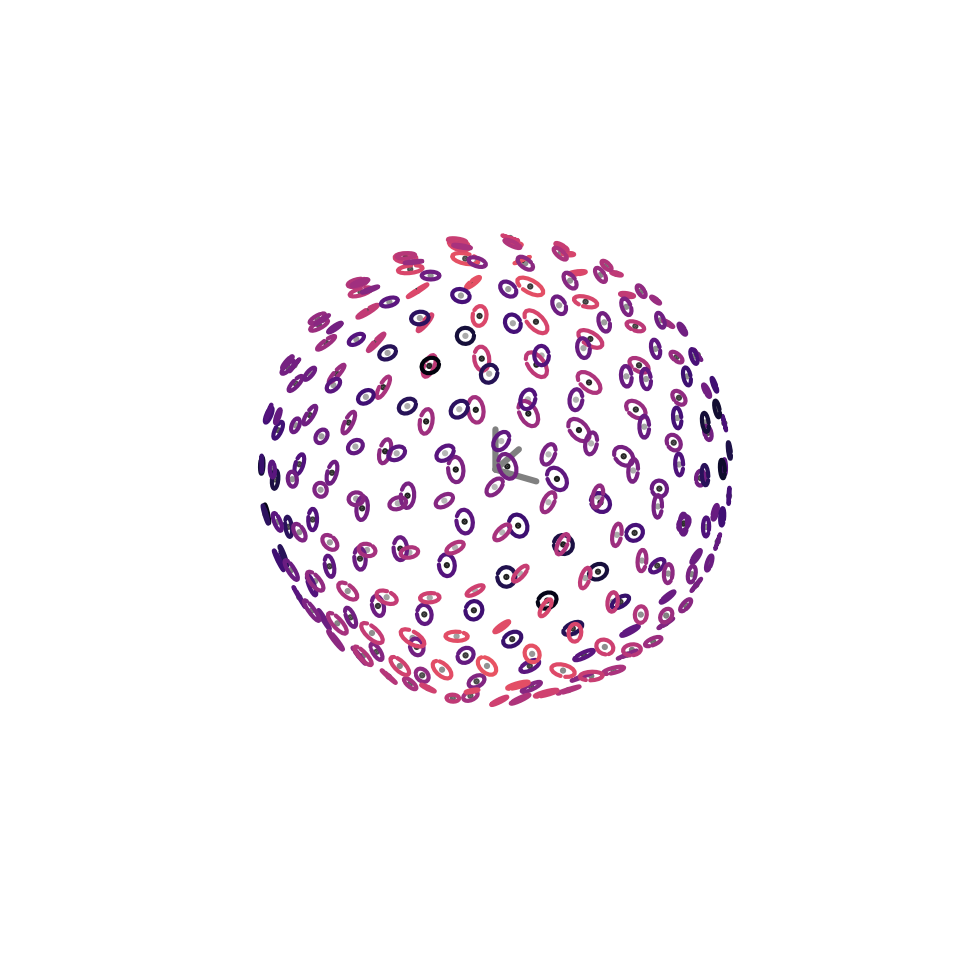

In [158]:
for wt in linspace(0, 2*pi, 1):
    sphere_snap(wt, nsphere=256, rcircle=0.2);

In [145]:
def get_sphere_snap(*args, **kws):
    fig = sphere_snap(*args, **kws);
    
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

In [146]:
nfs = 50
figlist = []
for wt in linspace(0, 2*pi, nfs):
    figlist.append(get_sphere_snap(wt, nsphere=256, rcircle=0.2))
    plt.close()
imageio.mimsave('sphere_22.gif', figlist, fps=12);